In [1]:
!pip install pystan~=2.14

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62.6 MB 1.2 MB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


In [2]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.5 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6752143 sha256=bc6f8d3ac6bb1b56d8d632b2d328c90fb5e66dcbf0c878ce192a265f17c31a24
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.1 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.


In [ ]:
# pip install pystan


In [ ]:
# conda install -c conda-forge fbprophet

In [ ]:
#pip install fbprophet

In [3]:
from fbprophet import Prophet

In [4]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

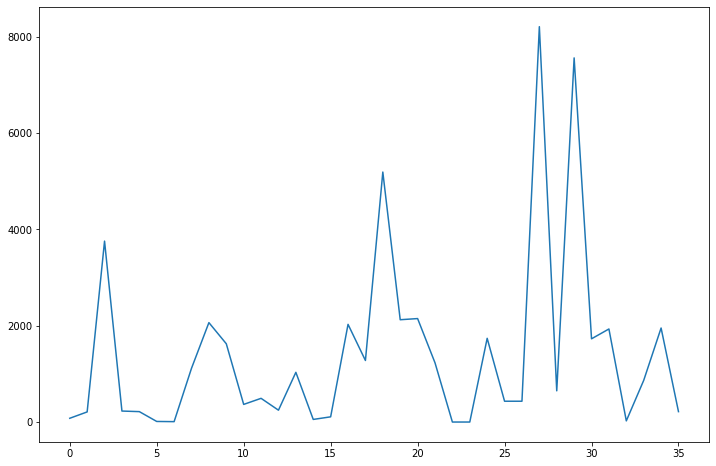

In [365]:

df_woodstream_p1=pd.read_excel('/content/Monthly_aggregated_29_11 (4).xlsx',sheet_name = '5962')
# df_woodstream_p1.set_index('ship_date_weekly',inplace=True)
df_woodstream_p1.loc[:,'shipped_count'].plot(kind = 'line',figsize = (12,8)) 

In [366]:
# df_woodstream_p1=df_woodstream_p1.groupby('ship_date_weekly').sum()  # group by

In [367]:
df_woodstream_p1

,ship_date_weekly,shipped_count
0,2019-04-01,78.0
1,2019-05-01,210.0
2,2019-06-01,3756.0
3,2019-07-01,228.0
4,2019-08-01,216.0
5,2019-09-01,12.0
6,2020-05-01,8.0
7,2020-06-01,1116.0
8,2020-07-01,2064.0
9,2020-08-01,1625.0


In [368]:
# df_woodstream_p1['QuantityShipped']['2014-03-13']

In [369]:
# df_woodstream_p1['ship_date_weekly']=df_woodstream_p1.index

In [370]:
# df_woodstream_p1.reset_index(drop=True, inplace=True)

In [371]:
df_woodstream_p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ship_date_weekly  36 non-null     datetime64[ns]
 1   shipped_count     36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


In [372]:
df_woodstream_p1['ship_date_weekly']=pd.to_datetime(df_woodstream_p1['ship_date_weekly'])

In [373]:
# df_woodstream_p1=df_woodstream_p1.sort_values('ship_date_weekly')

In [374]:
df_woodstream_p1

,ship_date_weekly,shipped_count
0,2019-04-01,78.0
1,2019-05-01,210.0
2,2019-06-01,3756.0
3,2019-07-01,228.0
4,2019-08-01,216.0
5,2019-09-01,12.0
6,2020-05-01,8.0
7,2020-06-01,1116.0
8,2020-07-01,2064.0
9,2020-08-01,1625.0


In [375]:
df_woodstream_p1.columns = ['ds','y']
df_woodstream_p1.head(10)

,ds,y
0,2019-04-01,78.0
1,2019-05-01,210.0
2,2019-06-01,3756.0
3,2019-07-01,228.0
4,2019-08-01,216.0
5,2019-09-01,12.0
6,2020-05-01,8.0
7,2020-06-01,1116.0
8,2020-07-01,2064.0
9,2020-08-01,1625.0


In [376]:
# from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# data_smoothen = SimpleExpSmoothing(df_woodstream_p1['y'], initialization_method="estimated").fit()
# df_woodstream_p1.reset_index(drop=True,inplace=True)


In [377]:
# data_smoothen=data_smoothen.fittedvalues.to_frame(name = 'y')
# data_smoothen.plot(kind = 'line')
# data_smoothen['ds'] = df_woodstream_p1['ds']
# data_smoothen

In [378]:
# data_smoothen.dropna(axis=0,inplace=True)

# df_woodstream_p1

## Slicing 2021 dec

> Indented block



In [379]:
df_woodstream_p2=df_woodstream_p1.loc[df_woodstream_p1['ds']<='2021-12-01']  # IMP  94,683 ,700,715,750,769,808

In [380]:
df_woodstream_p2.tail()

,ds,y
20,2021-07-01,2148.0
21,2021-08-01,1230.0
22,2021-09-01,0.0
23,2021-10-01,0.0
24,2021-11-01,1738.0


# MODEL

In [381]:
# Initialize the Model
# model=Prophet(daily_seasonality=False, weekly_seasonality=True,seasonality_mode='multiplicative',n_changepoints=22)
model=Prophet(seasonality_mode='additive',changepoint_prior_scale=0.001,n_changepoints=30,changepoint_range=0.95) # regular
# model=Prophet(seasonality_mode='additive',changepoint_prior_scale=0.1,n_changepoints=15,changepoint_range=0.95)

In [382]:
# slicing   (from 2017 )
# df_woodstream_p2=df_woodstream_p1[:293]

In [383]:
# df_woodstream_p1.iloc[663]
# df_woodstream_p2.reset_index(drop=True,inplace=True)

In [384]:
# df_woodstream_p2.tail(30)

In [385]:
# df_woodstream_p2=df_woodstream_p2[:94]

In [386]:
# df_woodstream_p2.tail()
df_woodstream_p2

,ds,y
0,2019-04-01,78.0
1,2019-05-01,210.0
2,2019-06-01,3756.0
3,2019-07-01,228.0
4,2019-08-01,216.0
5,2019-09-01,12.0
6,2020-05-01,8.0
7,2020-06-01,1116.0
8,2020-07-01,2064.0
9,2020-08-01,1625.0


In [387]:

model.fit(df_woodstream_p2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 22.


In [388]:
model.component_modes


{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [389]:
### Create future dates of 365 days

days_to_be_predicted = 12
future_dates=model.make_future_dataframe(periods=days_to_be_predicted,freq='M')

In [390]:
future_dates

,ds
0,2019-04-01
1,2019-05-01
2,2019-06-01
3,2019-07-01
4,2019-08-01
5,2019-09-01
6,2020-05-01
7,2020-06-01
8,2020-07-01
9,2020-08-01


In [391]:
prediction=model.predict(future_dates)


In [392]:
prediction[['ds','yhat' ]][-12:]

,ds,yhat
25,2021-11-30,3570.382573
26,2021-12-31,3691.383858
27,2022-01-31,1771.280508
28,2022-02-28,-3715.822610
29,2022-03-31,3212.383413
30,2022-04-30,3743.664995
31,2022-05-31,8945.320427
32,2022-06-30,1508.786336
33,2022-07-31,1951.734899
34,2022-08-31,2547.010450


In [393]:
df=pd.DataFrame()
df['yhat']=prediction['yhat' ][-11:].values
df['y']=df_woodstream_p1['y'][-11:].values

### Actual VS Predicted

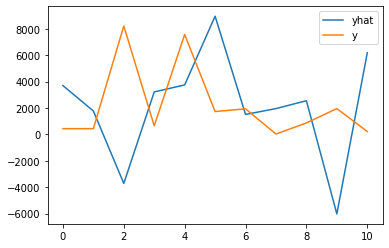

In [394]:
df.plot()

### 2022 SUM

In [395]:
df['yhat'].sum()

23807.12431795696

In [396]:
df['y'].loc[df['y']==0]=1

In [397]:

df['MAPE']=(abs(df['yhat']-df['y'])/df['y'])*100

# MAPE

In [398]:
df

,yhat,y,MAPE
0,3691.383858,432.0,754.487004
1,1771.280508,432.0,310.018636
2,-3715.822610,8208.0,145.270743
3,3212.383413,648.0,395.738181
4,3743.664995,7560.0,50.480622
5,8945.320427,1728.0,417.669006
6,1508.786336,1932.0,21.905469
7,1951.734899,24.0,8032.228745
8,2547.010450,865.0,194.452075
9,-6025.525990,1952.0,408.684733


In [399]:
abs(df['MAPE']).mean()

1226.4195326511285

In [303]:
model=Prophet(seasonality_mode='additive',changepoint_prior_scale=0.001,n_changepoints=30,changepoint_range=0.95)

model.fit(df_woodstream_p1)
days_to_be_predicted = 12+2
future_dates=model.make_future_dataframe(periods=days_to_be_predicted,freq='M')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 26.


In [304]:
prediction=model.predict(future_dates)

## 2023 Prediction

In [305]:
prediction['yhat'][-12:].sum()

3863.6647711223204

In [306]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2020-01-01,455.754759,-218.077518,432.905553,455.754759,455.754759,-0.764980,-0.764980,-0.764980,-0.764980,-0.764980,-0.764980,0.0,0.0,0.0,107.111537
1,2020-02-01,449.887918,-70.151364,558.983530,449.887918,449.887918,-0.440579,-0.440579,-0.440579,-0.440579,-0.440579,-0.440579,0.0,0.0,0.0,251.676674
2,2020-03-01,444.399583,351.253465,973.503667,444.399583,444.399583,0.489559,0.489559,0.489559,0.489559,0.489559,0.489559,0.0,0.0,0.0,661.959540
3,2020-04-01,438.532742,156.442841,787.237330,438.532742,438.532742,0.056781,0.056781,0.056781,0.056781,0.056781,0.056781,0.0,0.0,0.0,463.433128
4,2020-05-01,432.855154,369.261279,995.807188,432.855154,432.855154,0.547105,0.547105,0.547105,0.547105,0.547105,0.547105,0.0,0.0,0.0,669.672586
5,2020-06-01,426.988313,1266.505810,1897.262089,426.988313,426.988313,2.662182,2.662182,2.662182,2.662182,2.662182,2.662182,0.0,0.0,0.0,1563.708751
6,2020-07-01,421.310725,53.201895,677.134263,421.310725,421.310725,-0.120603,-0.120603,-0.120603,-0.120603,-0.120603,-0.120603,0.0,0.0,0.0,370.499532
7,2020-08-01,415.443884,133.403179,734.060797,415.443884,415.443884,0.042863,0.042863,0.042863,0.042863,0.042863,0.042863,0.0,0.0,0.0,433.250888
8,2020-09-01,409.577043,542.532840,1146.632652,409.577043,409.577043,1.038552,1.038552,1.038552,1.038552,1.038552,1.038552,0.0,0.0,0.0,834.944041
9,2020-10-01,403.899455,-57.209822,547.187809,403.899455,403.899455,-0.385990,-0.385990,-0.385990,-0.385990,-0.385990,-0.385990,0.0,0.0,0.0,247.998454


In [ ]:
# df_new.to_excel('prediction_new.xlsx')

In [ ]:
# prediction['yhat'][-28:].sum()

14434.148797490116

In [71]:
# prediction=model.predict(future_dates)

In [72]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
53,2023-08-31,11560.032077,4123.855564,10865.129114,11560.026647,11560.037310,-3984.784896,-3984.784896,-3984.784896,-3984.784896,-3984.784896,-3984.784896,0.0,0.0,0.0,7575.247182
54,2023-09-30,11741.573298,3863.260988,10565.321270,11741.567537,11741.578735,-4545.980715,-4545.980715,-4545.980715,-4545.980715,-4545.980715,-4545.980715,0.0,0.0,0.0,7195.592584
55,2023-10-31,11929.165893,10114.552943,17139.279085,11929.159967,11929.171631,1483.611325,1483.611325,1483.611325,1483.611325,1483.611325,1483.611325,0.0,0.0,0.0,13412.777219
56,2023-11-30,12110.707114,4755.935830,11590.419853,12110.700849,12110.713048,-3984.784896,-3984.784896,-3984.784896,-3984.784896,-3984.784896,-3984.784896,0.0,0.0,0.0,8125.922219
57,2023-12-31,12298.299709,6437.412819,13377.946546,12298.293187,12298.305843,-2490.444651,-2490.444651,-2490.444651,-2490.444651,-2490.444651,-2490.444651,0.0,0.0,0.0,9807.855058


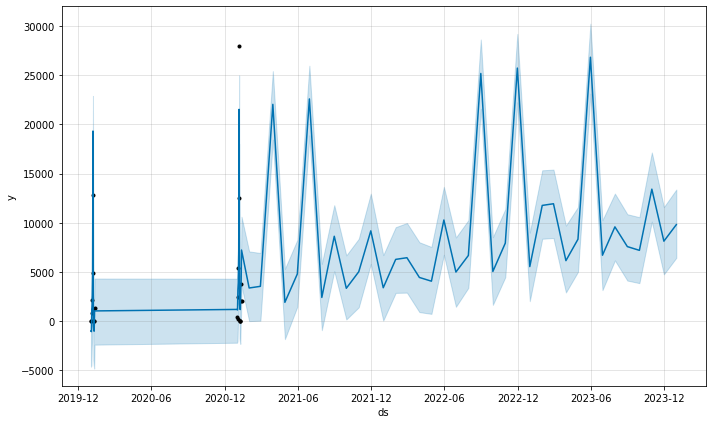

In [73]:


### plot the predicted projection
model.plot(prediction)
plt.show()



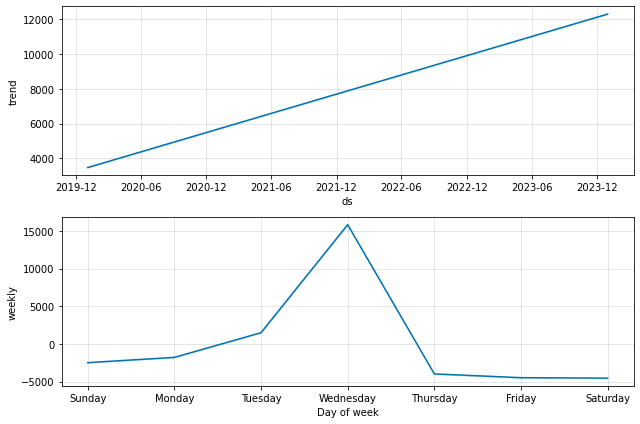

In [74]:


#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)
plt.show()

In [78]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='300 days', period='180 days', horizon = '50 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-11-23 00:00:00 and 2020-11-23 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-01-01,7925.051354,7776.760569,8061.442213,448.0,2020-11-23
1,2021-01-02,7930.101139,7798.623451,8068.199382,224.0,2020-11-23
2,2021-01-03,9034.158624,8894.457241,9170.211091,2464.0,2020-11-23
3,2021-01-04,10175.980937,10038.305615,10318.166879,5376.0,2020-11-23
4,2021-01-05,12860.089928,12721.153277,13006.306160,12544.0,2020-11-23


In [79]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,39 days,5.590630e+07,7477.051354,7477.051354,16.689847,0.0
1,40 days,5.938399e+07,7706.101139,7706.101139,34.402237,0.0
2,41 days,4.316698e+07,6570.158624,6570.158624,2.666460,0.0
3,42 days,2.303982e+07,4799.980937,4799.980937,0.892854,0.0
4,43 days,9.991284e+04,316.089928,316.089928,0.025198,0.0


In [ ]:
# df_p['mdape'].mean()

In [ ]:
# df_p['mae'].mean()

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


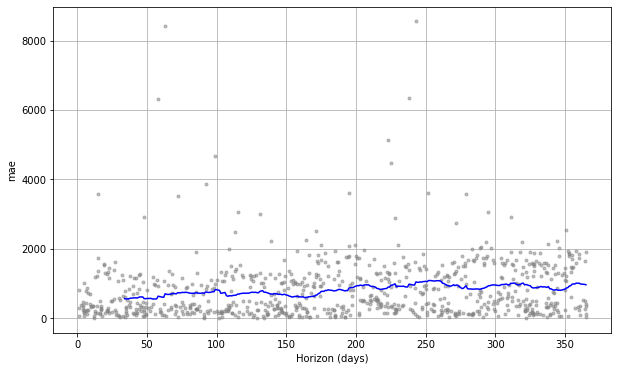

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')

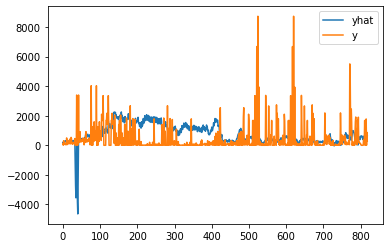

In [ ]:
df_cv[['yhat','y',]].plot()

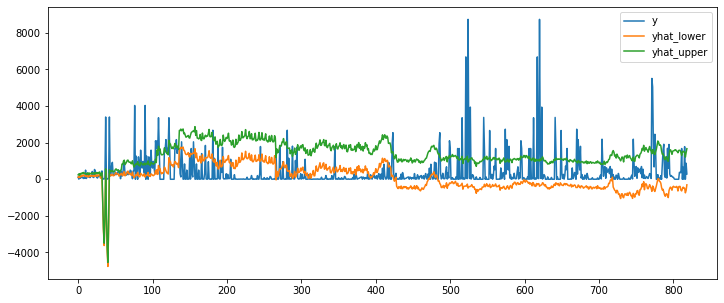

In [ ]:
df_cv[['y','yhat_lower','yhat_upper']].plot(figsize=(12,5))

In [ ]:
prediction


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-12-02,25.987375,-1293.465783,812.009131,25.987375,25.987375,-251.126846,-251.126846,-251.126846,-22.761920,-22.761920,-22.761920,-228.364926,-228.364926,-228.364926,0.0,0.0,0.0,-225.139471
1,2013-12-10,27.248453,-1410.171245,610.733694,27.248453,27.248453,-401.905253,-401.905253,-401.905253,-75.023487,-75.023487,-75.023487,-326.881766,-326.881766,-326.881766,0.0,0.0,0.0,-374.656800
2,2014-02-20,38.598157,-819.260510,1193.606060,38.598157,38.598157,160.801459,160.801459,160.801459,-18.327245,-18.327245,-18.327245,179.128704,179.128704,179.128704,0.0,0.0,0.0,199.399616
3,2014-02-26,39.543965,-735.056038,1302.739843,39.543965,39.543965,186.961006,186.961006,186.961006,-73.516140,-73.516140,-73.516140,260.477146,260.477146,260.477146,0.0,0.0,0.0,226.504972
4,2014-03-06,40.805043,-735.276967,1401.304751,40.805043,40.805043,303.962972,303.962972,303.962972,-18.327245,-18.327245,-18.327245,322.290217,322.290217,322.290217,0.0,0.0,0.0,344.768016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,2022-07-23,523.326545,-233.899674,1766.501299,523.326517,523.326574,266.704921,266.704921,266.704921,271.192117,271.192117,271.192117,-4.487196,-4.487196,-4.487196,0.0,0.0,0.0,790.031466
842,2022-07-24,523.484181,-648.747279,1353.385241,523.484152,523.484210,-134.513861,-134.513861,-134.513861,-128.811828,-128.811828,-128.811828,-5.702032,-5.702032,-5.702032,0.0,0.0,0.0,388.970320
843,2022-07-25,523.641816,-500.466532,1527.142410,523.641787,523.641845,-28.934160,-28.934160,-28.934160,-22.761920,-22.761920,-22.761920,-6.172240,-6.172240,-6.172240,0.0,0.0,0.0,494.707656
844,2022-07-26,523.799452,-555.474278,1480.390783,523.799423,523.799481,-80.870802,-80.870802,-80.870802,-75.023487,-75.023487,-75.023487,-5.847315,-5.847315,-5.847315,0.0,0.0,0.0,442.928650


In [ ]:
yhat=prediction['yhat'][-31:]  

In [ ]:
# df=pd.concat(df_woodstream_p1.iloc[663:],prediction['yhat'],axis=0)
yhat.sum()


15532.492549069462

In [ ]:
# df_y_actual=df_woodstream_p1[-48:].groupby('ds').sum()
# y_actual=df_woodstream_p1[-12:]
df_woodstream_p1[664:683]['y'].sum() # month jan actual

0.0

In [ ]:
df_woodstream_p1[664:683]

,y,ds


In [ ]:
df_woodstream_p1[664:669]['y'].sum()


0.0

In [ ]:
df_woodstream_p1[669:674]['y'].sum()

0.0

In [ ]:
df_woodstream_p1[674:677]['y'].sum()

0.0

In [ ]:
df_woodstream_p1[677:682]['y'].sum()

0.0

In [ ]:
prediction[-60:][['ds','yhat']]

,ds,yhat
786,2022-05-29,701.347738
787,2022-05-30,797.742911
788,2022-05-31,733.581224
789,2022-06-01,720.936497
790,2022-06-02,759.771988
791,2022-06-03,806.900757
792,2022-06-04,1010.466999
793,2022-06-05,588.370626
794,2022-06-06,670.875778
795,2022-06-07,593.921125


In [ ]:

print('1st week',prediction[-28:][0:8]['yhat'].sum())
print('2st week',prediction[-28:][8:15]['yhat'].sum()) # week sum
print('3st week',prediction[-28:][15:22]['yhat'].sum())
print('4st week',prediction[-28:][22:29]['yhat'].sum())
print('5st week',prediction[-28:][29:]['yhat'].sum())

1st week 3840.6236250777156
2st week 3745.704720377567
3st week 3717.6457652915988
4st week 3130.1746867432344
5st week 0.0


In [ ]:
# y_actual['y'].values
df_woodstream_p1[664:683]

,y,ds


In [ ]:
prediction[-30]

KeyError: ignored

In [ ]:
df=pd.DataFrame()
df['yhat']=yhat.values
df['actual']=y_actual['y'].values

In [ ]:
df.plot()

In [ ]:
# df_y_actual=pd.to_datetime(df_y_actual['ds'])
# df_y_actual['ds']=df_y_actual.index
# df_y_actual['ds']=pd.to_datetime(df_y_actual['ds'])
# df_y_actual.reset_index(drop=True,inplace=True)
# df_y_actual.sort_values('ds',inplace=True)

In [ ]:
# actual=df_y_actual['y']


In [ ]:
# actual.values

In [ ]:
# df_woodstream_p2['ds'][-12:].values

In [ ]:
# yhat

In [ ]:
# len(prediction['yhat'][293:])

In [ ]:
# len(prediction['yhat'][df_woodstream_p1.iloc[663:].index])

In [ ]:
# df['yhat']=yhat.values

In [ ]:
# df['actual']=actual.values

In [ ]:
# yhat=prediction['yhat'][df_woodstream_p1.iloc[663:].index] # 293,663

In [ ]:
# actual=df_woodstream_p1.iloc[663:]['y']

In [ ]:
# data={'yhat':yhat,'actual':actual}
# df=pd.concat(data,axis=1)

In [ ]:
# df.actual.sum()

In [ ]:
# df.plot()

In [ ]:
# df_woodstream_p1.iloc[664]
df['date']=df_woodstream_p1['ds'][-12:].values

In [ ]:
df['error']=(df['yhat']-df['actual'])/df['actual']

In [ ]:
df

In [ ]:
# mae=abs((abs(df['yhat'])-abs(df['actual']))/len(df))
mae=(sum(abs(abs(df['yhat'])-abs(df['actual']))))/len(df)

In [ ]:
mae

In [ ]:
df # MAE of daily =

In [ ]:
# mape=abs((abs(df['yhat'])-abs(df['actual']))/df['actual'])

In [69]:
mape=sum(abs((abs(df['yhat'])-abs(df['y']))/df['y']))/len(df)

In [70]:
mape

inf

In [ ]:
abs((abs(df['yhat'])-abs(df['actual'])))

In [ ]:
# df['actual'][df['actual']==0]=1

In [ ]:
# df['actual']